In [119]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Importing the dataset

In [121]:
data=pd.read_csv('SMSSpamCollection',sep='\t',names=["label", "message"])
data

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [122]:
data.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [123]:
data.tail(10)

,label,message
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...
5563,ham,Ard 6 like dat lor.
5564,ham,Why don't you wait 'til at least wednesday to ...
5565,ham,Huh y lei...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [124]:
data.shape

(5572, 2)

In [125]:
data.isna().sum()

label      0
message    0
dtype: int64

In [126]:
len(data)

5572

# Data Cleaning and Preprocessing

In [127]:
nltk.download('stopwords')
ps = PorterStemmer()
corpus = []
for i in range(0, len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')] # list comprehension 
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [128]:
    corpus[5570]

'guy bitch act like interest buy someth els next week gave us free'

# Creating the Bag of Words model

In [129]:
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

y=pd.get_dummies(data['label'])
y=y.iloc[:,1].values

In [130]:
len(X)

5572

In [131]:
len(y)

5572

In [134]:
X.shape

(5572, 2500)

# Splitting the dataset into the Training set and Test set

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Training model using Naive bayes classifier

 # 1.GaussianNB

In [138]:
GN_classifier = GaussianNB()
GN_classifier.fit(X_train, y_train)

GaussianNB()

In [139]:
GN_score = GN_classifier.score(X_test,y_test)
GN_score

0.8556053811659193

In [140]:
y_GN_pred = GN_classifier.predict(X_test)
y_GN_pred

array([0, 1, 0, ..., 0, 1, 1], dtype=uint8)

# 2.MultinomialNB

In [141]:
MN_classifier = MultinomialNB()
MN_classifier.fit(X_train, y_train)

MultinomialNB()

In [142]:
MN_score = MN_classifier.score(X_test,y_test)
MN_score

0.9856502242152466

In [143]:
y_MN_pred = MN_classifier.predict(X_test)
y_MN_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=uint8)

# Making the Confusion Matrix

In [144]:
GN_cm = confusion_matrix(y_test, y_GN_pred)
print(GN_cm)

[[807 148]
 [ 13 147]]


In [145]:
MN_cm = confusion_matrix(y_test, y_MN_pred)
print(MN_cm)

[[946   9]
 [  7 153]]


# Compare Both models

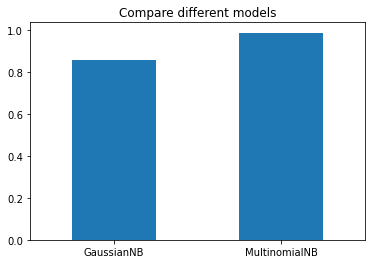

In [146]:
models = pd.DataFrame({"GaussianNB": GN_score,"MultinomialNB": MN_score},index=[0])
models.T.plot.bar(title="Compare different models",legend=False)
plt.xticks(rotation=0);